## Homework #2

### Dataset
In this homework, we will use the Laptops price dataset from <A Href="https://www.kaggle.com/datasets/juanmerinobermejo/laptops-price-dataset">Kaggle.</A>

Here's a wget-able <A Href="https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv">link:</A>

The goal of this homework is to create a regression model for predicting the prices (column '**Final Price**')

### Preparing the dataset

First, we'll normalize the names of the columns:

In [1]:
# loading the packages to be used in this asssignment
import pandas as pd
import numpy as np
import os

##############Loading data and get an overview##########
# reading csv file after dowloading
df = pd.read_csv("C:/Users/user/Machine_Learning_ZoomCamp/Machine Learning for Regression/Data/laptops.csv")

# Let us view first five records of our dataset
df.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [2]:
# Since some columns have spaces, let's normalize such columns by adding underscores and makining them lowercase
df = df.copy()
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head()

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


Now, instead of 'Final Price', we have 'final_price'.

Next, use only the following columns:
+ 'ram'
+ 'storage'
+ 'screen'
+ 'final_price'

In [3]:
df2 = df[['ram', 'storage', 'screen', 'final_price']]
df2.head()

,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01


### Exploratory Data Analysis (EDA)
+ Look at the final_price variable. Does it have a long tail?

In [4]:
# We want to understand how the data looks like just to get a feeling what values are there.
# We are looking at each column and printing some values
for col in df2.columns:
    print(col)
    print(df2[col].head())
    print()

ram
0     8
1     8
2     8
3    16
4    16
Name: ram, dtype: int64

storage
0     512
1     256
2     256
3    1000
4     512
Name: storage, dtype: int64

screen
0    15.6
1    15.6
2    15.6
3    15.6
4    15.6
Name: screen, dtype: float64

final_price
0    1009.00
1     299.00
2     789.00
3    1199.00
4     669.01
Name: final_price, dtype: float64



+ Distribution of the **final_price**
+ Look at the final_price variable. Does it have a long tail?

In [5]:
df2.shape

(2160, 4)

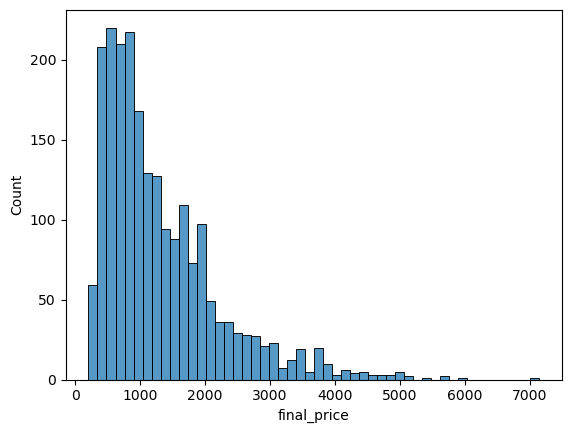

In [6]:
# Now I'm looking at the price and then visualize this column.
import matplotlib.pyplot as plt
import seaborn as sns

# this line is needed to display the plots in notebooks
%matplotlib inline

# # bin = number of bars in the histogram
# price = df2['final_price']
# sns.displot(price, kde=True)
# plt.show()

sns.histplot(df2.final_price, bins=50)
plt.show()

+ The **"final_price"** variable does not follow a normal distribution, it is rightly skewed from price 3000 to 7000. We need to standardize it in order for the laptop prices to be normaly distributed.

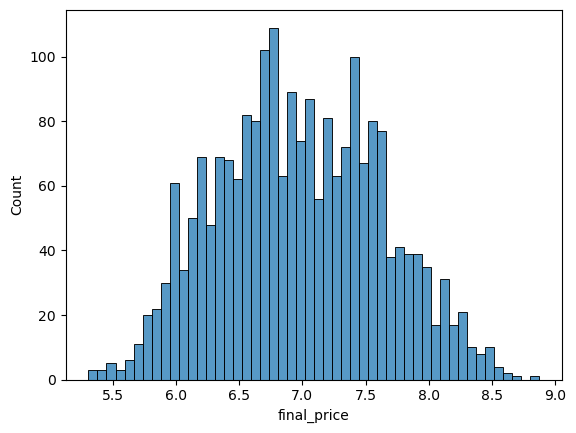

In [7]:
# Transform the distribution of final price
final_price_logs = np.log1p(df2.final_price)
sns.histplot(final_price_logs, bins=50)
plt.show()

### Question 1
There's one column with missing values. What is it?
+ 'ram'
+ 'storage'
+ 'screen'
+ 'final_price'

In [8]:
# Checking for the column that has missing values.
df2.isnull().sum()

ram            0
storage        0
screen         4
final_price    0
dtype: int64

+ **screen** column has a total of 4 columns with missing data.

### Question 2
What's the median (50% percentile) for variable 'ram'?

+ 8
+ 16
+ 24
+ 32

#### Prepare and split the dataset
+ Shuffle the dataset (the filtered one you created above), use seed 42.
+ Split your data in train/val/test sets, with 60%/20%/20% distribution.
  
Use the same code as in the lectures

In [9]:
#% 50 Percentile
df2['ram'].describe()

count    2160.000000
mean       15.413889
std         9.867815
min         4.000000
25%         8.000000
50%        16.000000
75%        16.000000
max       128.000000
Name: ram, dtype: float64

In [10]:
# ...................Prepare and split the dataset.................
# Shuffle the dataset (the filtered one you created above, use seed 42.
# Split your data in train/val/test sets, with 60%/20%/20% distribution.

# Returns the number of records of the whole dataset
print(len(df2)) # Output: 2160
print(int(len(df2) * 0.2)) # Output: 432

n = len(df2)
n_val = n_test = int(n * 0.2)
n_train = n-n_val-n_test
print(n, n_val, n_test) # Output: (2160, 432, 432)

df2_train = df2.iloc[:n_train]
df2_val = df2.iloc[n_train:n_train + n_val]
df2_test = df2.iloc[n_train + n_val:]

# Let's now shuffle our datasets to conclude division.
idx = np.arange(n)
# idx

# To make it reproducible.
np.random.seed(42)
np.random.shuffle(idx)
idx

# Using shuffle dataset to create training, validation and testing datasets
df2_train = df2.iloc[idx[:n_train]]
df2_val = df2.iloc[idx[n_train:n_train + n_val]]
df2_test = df2.iloc[idx[n_train + n_val:]]

# Now there is no order in the index column so we can reset index and drop the old index column
df2_train = df2_train.reset_index(drop=True)
df2_val = df2_val.reset_index(drop=True)
df2_test = df2_test.reset_index(drop=True)

# Let's apply log1p transformation to the final_price variable in order to be normaly distributed.
y_train = np.log1p(df2_train.final_price.values)
y_val = np.log1p(df2_val.final_price.values)
y_test = np.log1p(df2_test.final_price.values)

# Let us remove final_price values from the dataframes(df2_train, df2_val, df2_test) to make sure we don't use it for training purpoes.
del df2_train['final_price']
del df2_val['final_price']
del df2_test['final_price']
df2_train.head()

2160
432
2160 432 432


,ram,storage,screen
0,32,1000,15.6
1,4,64,14.1
2,32,1000,14.0
3,16,512,13.3
4,32,1000,16.0


### Question 3
+ We need to deal with missing values for the column from Q1.
+ We have two options: fill it with 0 or with the mean of this variable.
+ Try both options. For each, train a linear regression model without regularization using the code from the lessons.
+ For computing the mean, use the training only!
+ Use the validation dataset to evaluate the models and compare the RMSE of each option.
+ Round the RMSE scores to 2 decimal digits using round(score, 2)
+ Which option gives better RMSE?

Options:
+ With 0
+ With mean
+ Both are equally good

In [11]:
print(f"Training:\n{df2_train.isnull().sum()}\n")

print(f"Validation:\n{df2_val.isnull().sum()}\n")

print(f"Testing:\n{df2_test.isnull().sum()}")

Training:
ram        0
storage    0
screen     3
dtype: int64

Validation:
ram        0
storage    0
screen     1
dtype: int64

Testing:
ram        0
storage    0
screen     0
dtype: int64


In [12]:
df_train_0 = df2_train.fillna(0)
df_val_0 = df2_val.fillna(0)
print(df_train_0.isnull().sum())
print(df_val_0.isnull().sum())

ram        0
storage    0
screen     0
dtype: int64
ram        0
storage    0
screen     0
dtype: int64


In [13]:
df_train_0.head()

,ram,storage,screen
0,32,1000,15.6
1,4,64,14.1
2,32,1000,14.0
3,16,512,13.3
4,32,1000,16.0


In [14]:
df_train_mean = df2_train.fillna(df2_train['screen'].mean())
df_val_mean = df2_val.fillna(df2_val['screen'].mean())
df_val_mean.isnull().sum()

ram        0
storage    0
screen     0
dtype: int64

In [15]:
df_train_mean.isnull().sum()

ram        0
storage    0
screen     0
dtype: int64

In [16]:
# Training linear regression model.
df_train_0.iloc[10]

ram         16.0
storage    512.0
screen      15.6
Name: 10, dtype: float64

In [17]:
xi = [16, 512, 15]

def g(xi):
    # do something and return the predicted price of laptop
    return 10000

g(xi) # 10000

10000

In [18]:
# Implementation of the g-function (renamed as linear_regression).
def linear_regression(xi):
    n = len(xi)    
    pred = w0
     
    for j in range(n):
        pred = pred + w[j] * xi[j]
     
    return pred
 
# sample values for w0 and w and the given xi
xi = [138, 24, 1385]
w0 = 0
w = [1, 1, 1]
linear_regression(xi)

1547

In [19]:
# try some other values
w0 = 7.17
w = [0.01, 0.04, 0.002]
linear_regression(xi)

12.280000000000001

In [20]:
# There is still one important step to do. Because we logarithmized (log(y+1)) the price at the beginning, we now have to undo that. 
# This gives us the predicted price in $. Our car has a price of $215,344.72.

# Get the real prediction for the price in $
# We do "-1" here to undo the "+1" inside the log
np.exp(12.280000000000001) - 1
# Output: 215344.7166272456
 
# Shortcut to not do -1 manually
print(np.expm1(12.280000000000001))
# Output: 215344.7166272456
 
# Just for checking only
np.log1p(215344.7166272456)
# Output: 12.280000000000001

215344.7166272456


12.280000000000001

In [21]:
# Linear Regression vector form.
def dot(xi, w):
    n = len(xi)
    
    res = 0.0
    
    for j in range(n):
        res = res + xi[j] * w[j]
    
    return res

def linear_regression(xi):
    return w0 + dot(xi, w)

In [22]:
xi = [138, 24, 1385]
w0 = 7.17
w = [0.01, 0.04, 0.002]
 
# adding w0 to the vector w
w_new = [w0] + w
w_new
# Output: [7.17, 0.01, 0.04, 0.002]
 
xi
w_new
# Output: [138, 24, 1385]

[7.17, 0.01, 0.04, 0.002]

In [23]:
# Updated code for linear regression
def linear_regression(xi):
    xi = [1] + xi
    return dot(xi, w_new)
 
linear_regression(xi)
# Output: 12.280000000000001

12.280000000000001

In [24]:
w0 = 7.17
w = [0.01, 0.04, 0.002]
w_new = [w0] + w
 
x1  = [1, 148, 24, 1385]
x2  = [1, 132, 25, 2031]
x10 = [1, 453, 11, 86]
 
# X becomes a list of lists
X = [x1, x2, x10]
X
# Output: [[1, 148, 24, 1385], [1, 132, 25, 2031], [1, 453, 11, 86]]
 
# This turns the list of lists into a matrix
X = np.array(X)
X
# Output:
# array([[   1,  148,   24, 1385],
#              [   1,  132,   25, 2031],
#              [   1,  453,   11,   86]])
 
# Now we have predictions, so for each car we have a price for this car
y = X.dot(w_new)
 
# shortcut to not do -1 manually to get the real $ price
np.expm1(y) 
# Output: array([237992.82334859, 768348.51018973, 222347.22211011])

array([237992.82334859, 768348.51018973, 222347.22211011])

In [25]:
# The next snippet shows the implementation of the adapted linear_regression function
def linear_regression(X):
    return X.dot(w_new)
 
y = linear_regression(X)
np.expm1(y)
# Output: array([237992.82334859, 768348.51018973, 222347.22211011])

array([237992.82334859, 768348.51018973, 222347.22211011])

In [26]:
# Training A linear Regression Model.

# We need to implement the function train_linear_regression, 
# that takes the feature matrix X and the target variable y and returns the vector w.
def train_linear_regression(X, y):
    pass

In [27]:
# To approach this implementation we first use a simplified example.
X =[
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 83],
    [38, 54, 185],
    [142, 25, 431],
    [453, 31, 86],  
]
 
X = np.array(X)
X
# Output: 
# array([[ 148,   24, 1385],
#             [ 132,   25, 2031],
#             [ 453,   11,   86],
#             [ 158,   24,  185],
#             [ 172,   25,  201],
#             [ 413,   11,   83],
#             [  38,   54,  185],
#             [ 142,   25,  431],
#             [ 453,   31,   86]])

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   83],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [28]:
# Let's add a new column with ones to the feature matrix X
# That is for the multiplication with w0.
ones = np.ones(9)
ones
# Output: array([1., 1., 1., 1., 1., 1., 1., 1., 1.])
 
# X.shape[0] looks at the number of rows and creates the vector of ones
ones = np.ones(X.shape[0])
ones
# Output: array([1., 1., 1.])

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [29]:
# Now we need to stack this vector of ones with our feature matrix X. 
# For this we can use the NumPy function np.column_stack() as shown in the next snippet.
np.column_stack([ones, ones])
# Output: 
# array([[1., 1.],
#             [1., 1.],
#             [1., 1.],
#             [1., 1.],
#             [1., 1.],
#             [1., 1.],
#             [1., 1.],
#             [1., 1.],
#             [1., 1.]])

array([[1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.]])

In [30]:
X = np.column_stack([ones, X])
y = [10000, 20000, 15000, 25000, 10000, 20000, 15000, 25000, 12000]
 
# GRAM MATRIX
XTX = X.T.dot(X)
 
# Inverse GRAM MATRIX
XTX_inv = np.linalg.inv(XTX)

In [31]:
# In the following code snippet we test whether the multiplication of
# XTX with XTX_inv actually produces the Identity matrix I.
# Without round(1) it's not exactly identity matrix but the other values 
# are very close to 0 --> we can treat them as 0 and take it as identity matrix
XTX.dot(XTX_inv)
# Output:
#array([[ 1.00000000e+00,  2.60208521e-18,  4.85722573e-17,
         # 1.08420217e-18],
#       [ 4.54747351e-13,  1.00000000e+00,  1.50990331e-14,
         # 2.22044605e-16],
#       [ 5.68434189e-14,  1.11022302e-16,  1.00000000e+00,
         # 3.46944695e-17],
#       [ 9.09494702e-13,  0.00000000e+00, -2.13162821e-14,
         # 1.00000000e+00]])
 
# This gives us the I matrix
XTX.dot(XTX_inv).round(1)
# Output: 
# array([[ 1.,  0.,  0.,  0.],
#             [ 0.,  1.,  0.,  0.],
#             [ 0.,  0.,  1.,  0.],
#             [ 0.,  0., -0.,  1.]])

array([[ 1.,  0., -0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0., -0.,  1.]])

In [32]:
# Now we can implement the formula to get the full w vector.
# w_full contains all the weights
w_full = XTX_inv.dot(X.T).dot(y)
w_full
# Output: array([ 3.00092529e+04, -2.27839691e+01, -2.57690874e+02, -2.30322797e+00])

array([ 3.00092529e+04, -2.27839691e+01, -2.57690874e+02, -2.30322797e+00])

In [33]:
# From that vector w_full we can extract w0 and all the other weights.
w0 = w_full[0]
w = w_full[1:]
w0, w
# Output: (30009.25292276666, array([ -22.78396914, -257.69087426,   -2.30322797]))

(30009.2529227667, array([ -22.78396914, -257.69087426,   -2.30322797]))

In [34]:
# Now we can implement the function train_linear_regression, that takes the feature matrix X and the target variable y
# and returns w0 and the vector w.
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
     
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
     
    return w_full[0], w_full[1:]

In [35]:
# Let’s test this newly implemented function with some simple examples:
X =[
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 83],
    [38, 54, 185],
    [142, 25, 431],
    [453, 31, 86],  
]
 
X = np.array(X)
y = [10000, 20000, 15000, 25000, 10000, 20000, 15000, 25000, 12000]
 
train_linear_regression(X, y)
# Output: (30009.25292276666, array([ -22.78396914, -257.69087426,   -2.30322797]))

(30009.2529227667, array([ -22.78396914, -257.69087426,   -2.30322797]))

### Laptop Price Baseline Model

In [36]:
df_train_0.columns

Index(['ram', 'storage', 'screen'], dtype='object')

In [37]:
df_train_0.dtypes

ram          int64
storage      int64
screen     float64
dtype: object

In [38]:
# We choose the columns ram, screan, and storage for our base model.
base = ['ram', 'storage', 'screen']
 
df_train_0[base].head()

,ram,storage,screen
0,32,1000,15.6
1,4,64,14.1
2,32,1000,14.0
3,16,512,13.3
4,32,1000,16.0


In [39]:
# Value extraction
X_train = df_train_0[base].values
X_train
# Output:
#array([[ 310.,    8.,   18.,   13., 1851.],
#            [ 170.,    4.,   32.,   24.,  640.],
#            [ 165.,    6.,   15.,   13.,  549.],
#            ...,
#            [ 342.,    8.,   24.,   17.,  454.],
#            [ 170.,    4.,   28.,   23., 2009.],
#            [ 160.,    6.,   19.,   14.,  586.]])

array([[  32. , 1000. ,   15.6],
       [   4. ,   64. ,   14.1],
       [  32. , 1000. ,   14. ],
       ...,
       [  16. ,  512. ,   15.6],
       [  16. ,  512. ,   14. ],
       [  16. ,  512. ,   14. ]])

In [40]:
# Misssing values
df_train_0[base].isnull().sum()

ram        0
storage    0
screen     0
dtype: int64

In [41]:
y_train

array([7.024907  , 5.30851519, 6.90649448, ..., 6.96602419, 7.42177579,
       6.96318999])

In [42]:
w0, w = train_linear_regression(X_train, y_train)
w0, w

(6.7271637061124805, array([ 0.02630589,  0.00066041, -0.03651909]))

In [43]:
# We can use this two variables to apply the model to our training dataset to see how well the model has learned 
# the training data. 
# We do not want the model to simply memorize the data, but to recognize the correlations. Later, 
# we’ll also apply the model to unseen data so that we can eliminate memorization.
X_val_0 = df_val_0
y_pred_0 = w0 + X_val_0.dot(w)
y_pred_0

0      7.645053
1      6.916488
2      6.811265
3      6.610015
4      6.706041
         ...   
427    6.547395
428    6.620971
429    6.764472
430    6.974919
431    6.363386
Length: 432, dtype: float64

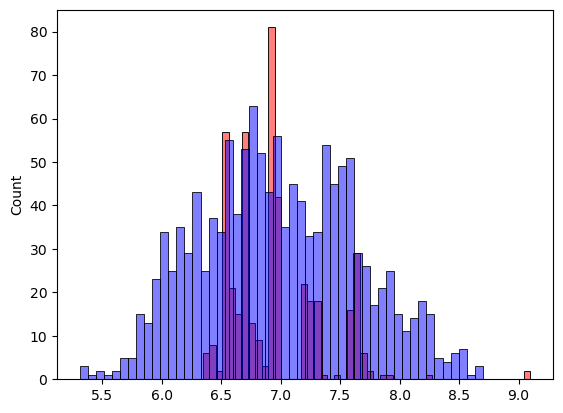

In [44]:
# Plotting the model performance

# alpha changes the transparency of the bars
# bins specifies the number of bars
sns.histplot(y_pred_0, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)
plt.show()

In [45]:
X_val_mean = df_val_mean
df_train_mean.head()

,ram,storage,screen
0,32,1000,15.6
1,4,64,14.1
2,32,1000,14.0
3,16,512,13.3
4,32,1000,16.0


In [46]:
df_train_mean.dtypes

ram          int64
storage      int64
screen     float64
dtype: object

In [47]:
# We choose the columns ram, screan, and storage for our base model.
base = ['ram', 'storage', 'screen']
 
df_train_mean[base].head()

,ram,storage,screen
0,32,1000,15.6
1,4,64,14.1
2,32,1000,14.0
3,16,512,13.3
4,32,1000,16.0


In [48]:
# Value extraction
X_train_mean = df_train_mean[base].values
X_train_mean

array([[  32. , 1000. ,   15.6],
       [   4. ,   64. ,   14.1],
       [  32. , 1000. ,   14. ],
       ...,
       [  16. ,  512. ,   15.6],
       [  16. ,  512. ,   14. ],
       [  16. ,  512. ,   14. ]])

In [49]:
y_train

array([7.024907  , 5.30851519, 6.90649448, ..., 6.96602419, 7.42177579,
       6.96318999])

In [50]:
w0, w = train_linear_regression(X_train_mean, y_train)
w0, w

(6.855566544134296, array([ 0.02650252,  0.00066643, -0.04534341]))

In [51]:
y_pred_mean = w0 + X_val_mean.dot(w)
y_pred_mean

0      7.644579
1      6.913460
2      6.807450
3      6.621521
4      6.701440
         ...   
427    6.563425
428    6.635124
429    6.773989
430    6.986009
431    6.369420
Length: 432, dtype: float64

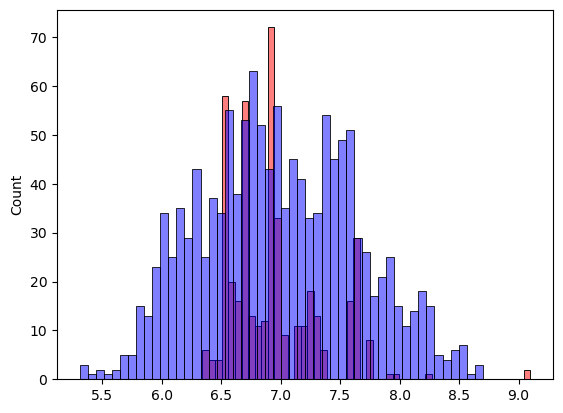

In [52]:
sns.histplot(y_pred_mean, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)
plt.show()

In [53]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

rmse_0 = (rmse(y_val, y_pred_0)).round(2)
rmse_mean = rmse(y_val, y_pred_mean).round(2)

# Compare RMSEs
if rmse_0 < rmse_mean:
    print("Filling missing values with 0 gives a better RMSE.")
elif rmse_0 == rmse_mean:
    print("Filling missing values with the mean and 0 are both giving better RMSE")
else:
    print("Filling missing values with the mean gives a better RMSE.")

Filling missing values with the mean and 0 are both giving better RMSE


In [54]:
print(rmse_0)
print(rmse_mean)

0.43
0.43


### Question 4
+ Now let's train a regularized linear regression.
+ For this equation, fill the NAs with 0
+ Try different values of r from the list: [0, 0.01, 0.1, 1, 5, 10, 100]
+ Use RMSE to evaluate the model on the validation dataset.
+ Round the RMSE scores to 2 decimal digits.
+ Which r gives the best RMSE?

If there are multiple options, select the smallest r.
Options:
+ 0
+ 0.01
+ 1
+ 10
+ 100

In [55]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]
    
base = ['ram', 'storage', 'screen']
X_train = X_train = df_train_0[base].values
y_train = y_train.copy()

for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    w_0, w = train_linear_regression_reg(X_train, y_train)
    print('%5s, %.2f, %.2f, %.2f' % (r, w_0, w[1], w[2]))

    0, 6.73, 0.00, -0.04
 0.01, 6.73, 0.00, -0.04
  0.1, 6.73, 0.00, -0.04
    1, 6.73, 0.00, -0.04
    5, 6.73, 0.00, -0.04
   10, 6.73, 0.00, -0.04
  100, 6.73, 0.00, -0.04


In [56]:
X_train = X_train.copy()
w_0, w = train_linear_regression_reg(X_train, y_train, r=0)

y_pred = w_0 + X_train.dot(w)
print('train', rmse(y_train, y_pred).round(2))

X_val = X_val_0.copy()
y_pred = w_0 + X_val.dot(w)
print('val', rmse(y_val, y_pred).round(2))

train 0.45
val 0.43


In [57]:
X_train = X_train.copy()
w_0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

y_pred = w_0 + X_train.dot(w)
print('train', rmse(y_train, y_pred).round(2))

X_val = X_val_0.copy()
y_pred = w_0 + X_val.dot(w)
print('val', rmse(y_val, y_pred).round(2))

train 0.45
val 0.43


In [58]:
X_train = X_train.copy()
w_0, w = train_linear_regression_reg(X_train, y_train, r=0.1)

y_pred = w_0 + X_train.dot(w)
print('train', rmse(y_train, y_pred).round(2))

X_val = X_val_0.copy()
y_pred = w_0 + X_val.dot(w)
print('val', rmse(y_val, y_pred).round(2))

train 0.45
val 0.43


In [59]:
X_train = X_train.copy()
w_0, w = train_linear_regression_reg(X_train, y_train, r=1)

y_pred = w_0 + X_train.dot(w)
print('train', rmse(y_train, y_pred).round(2))

X_val = X_val_0.copy()
y_pred = w_0 + X_val.dot(w)
print('val', rmse(y_val, y_pred).round(2))

train 0.45
val 0.43


In [60]:
X_train = X_train.copy()
w_0, w = train_linear_regression_reg(X_train, y_train, r=5)

y_pred = w_0 + X_train.dot(w)
print('train', rmse(y_train, y_pred).round(2))

X_val = X_val_0.copy()
y_pred = w_0 + X_val.dot(w)
print('val', rmse(y_val, y_pred).round(2))

train 0.49
val 0.46


In [61]:
X_train = X_train.copy()
w_0, w = train_linear_regression_reg(X_train, y_train, r=10)

y_pred = w_0 + X_train.dot(w)
print('train', rmse(y_train, y_pred).round(2))

X_val = X_val_0.copy()
y_pred = w_0 + X_val.dot(w)
print('val', rmse(y_val, y_pred).round(2))

train 0.53
val 0.51


In [62]:
X_train = X_train.copy()
w_0, w = train_linear_regression_reg(X_train, y_train, r=100)

y_pred = w_0 + X_train.dot(w)
print('train', rmse(y_train, y_pred).round(2))

X_val = X_val_0.copy()
y_pred = w_0 + X_val.dot(w)
print('val', rmse(y_val, y_pred).round(2))

train 0.71
val 0.67


### Question 5
+ We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
+ Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
+ For each seed do the train/validation/test split with 60%/20%/20% distribution.
+ Fill the missing values with 0 and train the model without regulation.
+ For each seed, evaluate the model on the validation datasets and collect the RMSE scores
+ What's the standard deviation of all the scores? To compute the standard deviation, use np.std
+ Round the result to 3 decimal digits (round(std, 3))

What's the value of std?
+ 19.176
+ 29.176
+ 39.176
+ 49.176

In [63]:
data = df2.copy()

#######Split the dataset like previously, use seed 9####
n = len(df2)
n_val = n_test = int(n * 0.2)
n_train = n-n_val-n_test

df2_train = df2.iloc[:n_train]
df2_val = df2.iloc[n_train:n_train + n_val]
df2_test = df2.iloc[n_train + n_val:]

# Let's now shuffle our datasets to conclude division.
idx = np.arange(n)
# idx

# To make it reproducible.
np.random.seed(9)
np.random.shuffle(idx)
idx

# Using shuffle dataset to create training, validation and testing datasets
df2_train = df2.iloc[idx[:n_train]]
df2_val = df2.iloc[idx[n_train:n_train + n_val]]
df2_test = df2.iloc[idx[n_train + n_val:]]

# Now there is no order in the index column so we can reset index and drop the old index column
df2_train = df2_train.reset_index(drop=True)
df2_val = df2_val.reset_index(drop=True)
df2_test = df2_test.reset_index(drop=True)

df_train = df2_train.fillna(0)
df_test = df2_test.fillna(0)
df_val = df2_val.fillna(0)

print(df_train.isnull().sum())
print(df_test.isnull().sum())
print(df_val.isnull().sum())

# Training the model
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
     
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
     
    return w_full[0], w_full[1:]

def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

base = ['ram', 'storage', 'screen']
X_train = df_train[base].values
X_val = df_val[base].values
X_test = df_test[base].values

y_train = df_train.final_price.values
y_val = df_val.final_price.values
y_test = df_test.final_price.values

w_0, w = train_linear_regression_reg(X_train, y_train)
y_pred = w_0 + X_val.dot(w)
rmse_val_seed_9 = rmse(y_val, y_pred).round(2)
# rmse_val_seed_0 = 565.45
# rmse_val_seed_1 = 636.8
# rmse_val_seed_2 = 588.96
# rmse_val_seed_3 = 597.81
# rmse_val_seed_4 = 571.97
# rmse_val_seed_5 = 573.24
# rmse_val_seed_6 = 647.34
# rmse_val_seed_7 = 550.44
# rmse_val_seed_8 = 587.33
# rmse_val_seed_9 = 576.1
rmse_scores = np.array([565.45, 636.8, 588.96, 597.81, 571.97, 573.24, 647.34, 550.44, 587.33, 576.1])
standard_deviation_rmse = rmse_scores.std().round(3)
standard_deviation_rmse

ram            0
storage        0
screen         0
final_price    0
dtype: int64
ram            0
storage        0
screen         0
final_price    0
dtype: int64
ram            0
storage        0
screen         0
final_price    0
dtype: int64


29.176

### Question 6
+ Split the dataset like previously, use seed 9.
+ combine train and validation datasets.
+ Fill the missing values with 0 and train a model with r=0.001
+ What's the RMSE on the test dataset?

In [64]:
data = df2.copy()

#######Split the dataset like previously, use seed 9####
n = len(df2)
n_val = n_test = int(n * 0.2)
n_train = n-n_val-n_test

df2_train = df2.iloc[:n_train]
df2_val = df2.iloc[n_train:n_train + n_val]
df2_test = df2.iloc[n_train + n_val:]

# Let's now shuffle our datasets to conclude division.
idx = np.arange(n)
# idx

# To make it reproducible.
np.random.seed(9)
np.random.shuffle(idx)
idx

# Using shuffle dataset to create training, validation and testing datasets
df2_train = df2.iloc[idx[:n_train]]
df2_val = df2.iloc[idx[n_train:n_train + n_val]]
df2_test = df2.iloc[idx[n_train + n_val:]]

# Now there is no order in the index column so we can reset index and drop the old index column
df2_train = df2_train.reset_index(drop=True)
df2_val = df2_val.reset_index(drop=True)
df2_test = df2_test.reset_index(drop=True)

#############combine train and validation datasets#####
df_training = pd.concat([df2_train, df2_val], axis=0)
df_testing = df2_test.copy()

############Fill the missing values with 0 and train a model with r=0.001##########
# Fill missing values
df_training = df_training.fillna(0)
df_testing = df_testing.fillna(0)
print(df_training.isnull().sum())
print(df_testing.isnull().sum())

# Let's apply log1p transformation to the final_price variable in order to be normaly distributed.
y_train = np.log1p(df_training.final_price.values)
y_test = np.log1p(df_testing.final_price.values)

base = ['ram', 'storage', 'screen']
X_train = df_training[base].values
X_test = df_testing[base].values

# Training the Model with regularization
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)
    
w_0, w = train_linear_regression_reg(X_train, y_train)

X_test = X_test.copy()
y_test = y_test.copy()
y_test1 = np.expm1(y_test)
y_pred = w_0 + X_test.dot(w)
y_pred1 = np.expm1(y_pred)
rmse_test = rmse(y_test1, y_pred1).round(2)
print('RMSE on Test Dataset: ', rmse_test)

ram            0
storage        0
screen         0
final_price    0
dtype: int64
ram            0
storage        0
screen         0
final_price    0
dtype: int64
RMSE on Test Dataset:  890.59


### Using the model